# Task 1: EDA and Preprocessing

Exploratory data analysis and cleaning for CrediTrust complaints: focusing on narratives for RAG pipeline preparation.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Settings
pd.set_option('display.max_columns', None)

# Load data
DATA_PATH = '../data/raw/complaints.csv'
df = pd.read_csv(DATA_PATH)
df.head()


/var/folders/wk/8lqwph4j6gd0kmpft5prl_dc0000gn/T/ipykernel_5278/2476499573.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## Overview & Columns
Print basic info, NA stats, and column names.


In [2]:
df.info()
df.describe(include='all')
df.isnull().mean().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

Tags                            9.345701e-01
Consumer disputed?              9.200504e-01
Consumer complaint narrative    6.898211e-01
Company public response         4.963900e-01
Consumer consent provided?      1.716541e-01
Sub-issue                       8.736105e-02
Sub-product                     2.448491e-02
State                           5.672961e-03
ZIP code                        3.145540e-03
Company response to consumer    2.081209e-06
Issue                           6.243628e-07
Date sent to company            0.000000e+00
Timely response?                0.000000e+00
Date received                   0.000000e+00
Submitted via                   0.000000e+00
Product                         0.000000e+00
Company                         0.000000e+00
Complaint ID                    0.000000e+00
dtype: float64

## Product Distribution
Explore and visualize how complaints are distributed across product types.


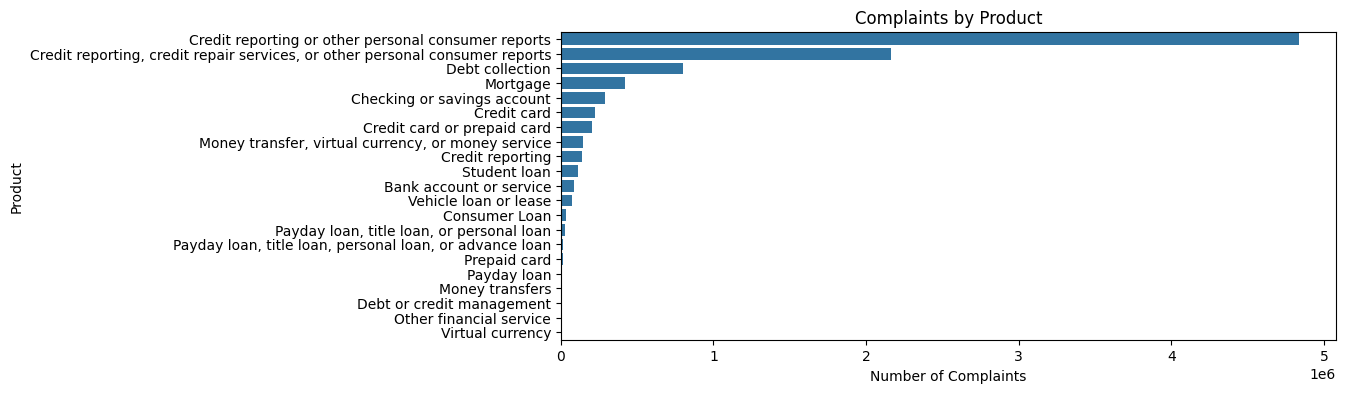

In [3]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, y='Product', order=df['Product'].value_counts().index)
plt.title('Complaints by Product')
plt.xlabel('Number of Complaints')
plt.show()


## Narrative Length Analysis
Look at word count stats and visualize the distribution.


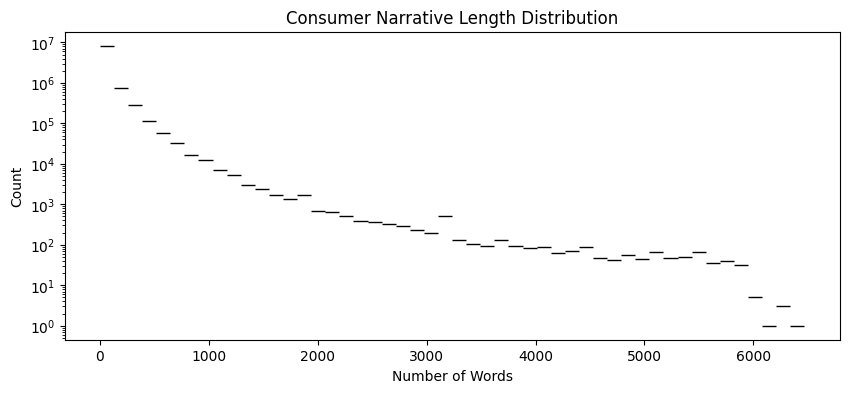

count    9.609797e+06
mean     5.446667e+01
std      1.497672e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      6.469000e+03
Name: narrative_length, dtype: float64

In [4]:
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,4))
sns.histplot(df['narrative_length'], bins=50, log_scale=(False, True))
plt.title('Consumer Narrative Length Distribution')
plt.xlabel('Number of Words')
plt.show()
df['narrative_length'].describe()


## Complaints With and Without Narratives
Count and proportion.


In [5]:
with_narr = df['Consumer complaint narrative'].notnull().sum()
without_narr = df['Consumer complaint narrative'].isnull().sum()
print(f'With narrative: {with_narr}, Without narrative: {without_narr}')


With narrative: 2980756, Without narrative: 6629041


## Filtered Dataset
Keep only complaints for specified products, with non-empty narratives.


In [6]:
products = ['Credit card', 'Personal loan', 'Savings account', 'Money transfers']
filtered = df[df['Product'].isin(products) & df['Consumer complaint narrative'].notnull() & (df['Consumer complaint narrative'].str.strip() != '')].copy()
filtered.info()
filtered['Product'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Index: 82164 entries, 12237 to 9601621
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 82164 non-null  object
 1   Product                       82164 non-null  object
 2   Sub-product                   63327 non-null  object
 3   Issue                         82164 non-null  object
 4   Sub-issue                     61770 non-null  object
 5   Consumer complaint narrative  82164 non-null  object
 6   Company public response       39566 non-null  object
 7   Company                       82164 non-null  object
 8   State                         81857 non-null  object
 9   ZIP code                      82164 non-null  object
 10  Tags                          14889 non-null  object
 11  Consumer consent provided?    82164 non-null  object
 12  Submitted via                 82164 non-null  object
 13  Date sent to co

Product
Credit card        80667
Money transfers     1497
Name: count, dtype: int64

## Cleaning Narratives
Lowercasing, removing special characters and boilerplate.


In [7]:
import re

def clean_text(text):
    text = text.lower().strip()
    # Remove basic boilerplate (optional: add more patterns)
    text = re.sub(r'i am writing to (file|lodge|submit) a complaint[\s\S]*?\.', '', text)
    text = re.sub(r'[^\w\s.,]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

filtered['clean_narrative'] = filtered['Consumer complaint narrative'].apply(clean_text)
filtered[['Consumer complaint narrative', 'clean_narrative']].head(3)


,Consumer complaint narrative,clean_narrative
12237,A XXXX XXXX card was opened under my name by a...,a xxxx xxxx card was opened under my name by a...
13280,"Dear CFPB, I have a secured credit card with c...","dear cfpb, i have a secured credit card with c..."
13506,I have a Citi rewards cards. The credit balanc...,i have a citi rewards cards. the credit balanc...


## Save Cleaned Data



In [8]:
filtered.to_csv('../data/filtered_complaints.csv', index=False)
print('Filtered, cleaned data saved.')


Filtered, cleaned data saved.
